In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from src.helper import logging as log
from src.networks import embedding, reconstruction
import matplotlib.pyplot as plt

_=torch.manual_seed(0)

In [2]:
x = torch.randn(1,1,28,28)
e = embedding.CNN()
d = reconstruction.dCNN()
print(e(x).shape)
d(e(x)).shape

torch.Size([1, 32, 7, 7])


torch.Size([1, 1, 28, 28])

Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.949212

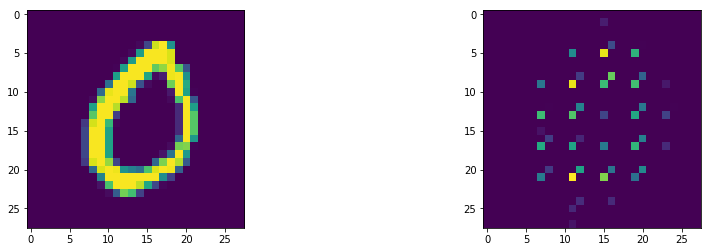

Train Epoch: 2 [57600/60000 (96%)]	Loss: 1.019387

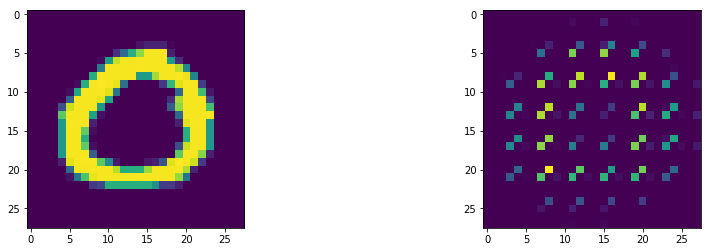

Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.847826

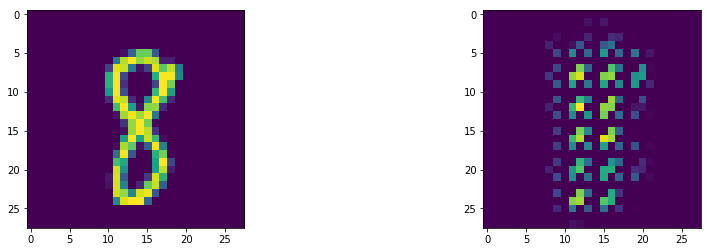

Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.821386

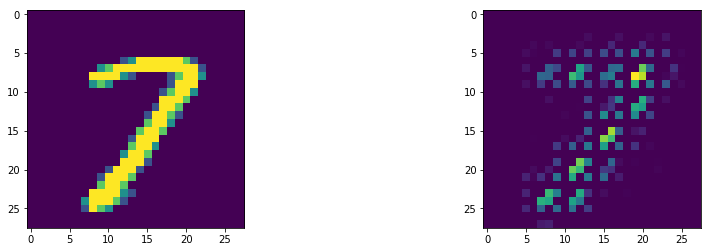

Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.915285

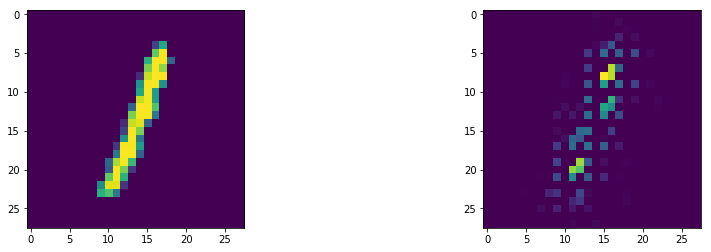

Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.848034

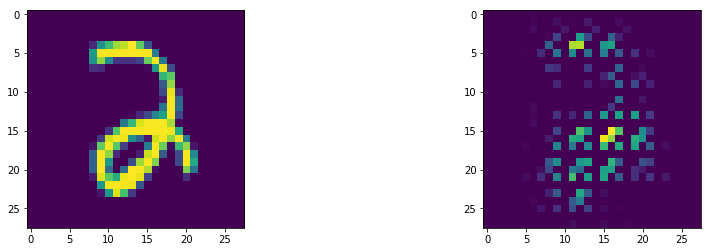

Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.748201

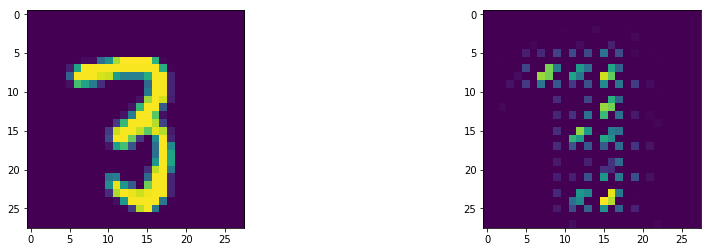

Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.838996

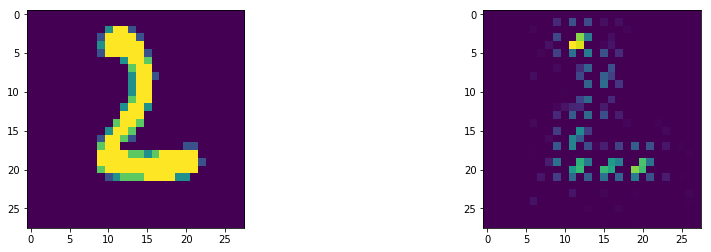

Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.770775

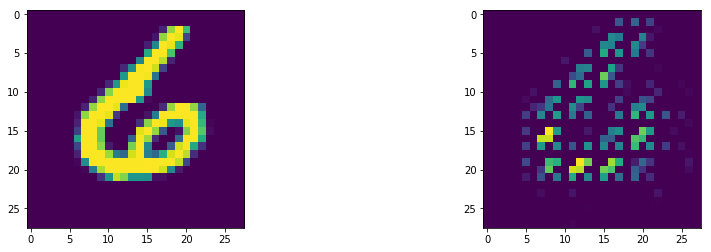

Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.735345

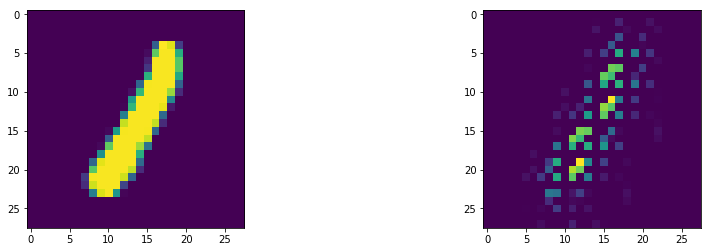

Train Epoch: 11 [57600/60000 (96%)]	Loss: 0.776057

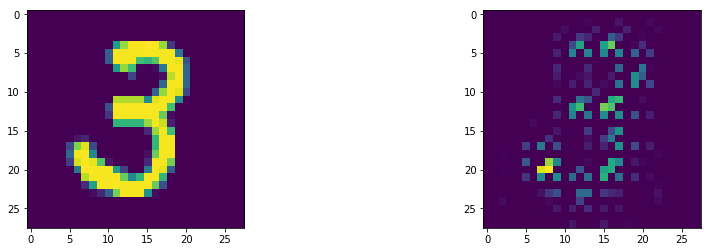

Train Epoch: 12 [57600/60000 (96%)]	Loss: 0.764895

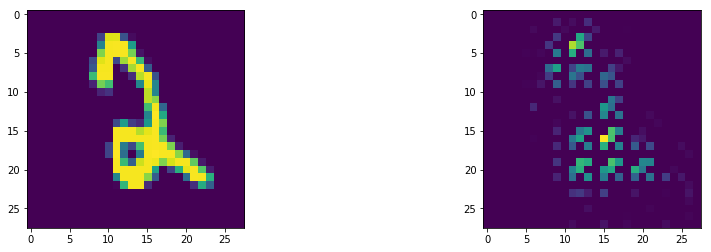

Train Epoch: 13 [57600/60000 (96%)]	Loss: 0.802918

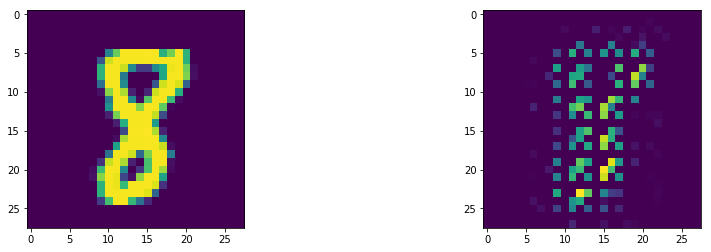

Train Epoch: 14 [57600/60000 (96%)]	Loss: 0.736203

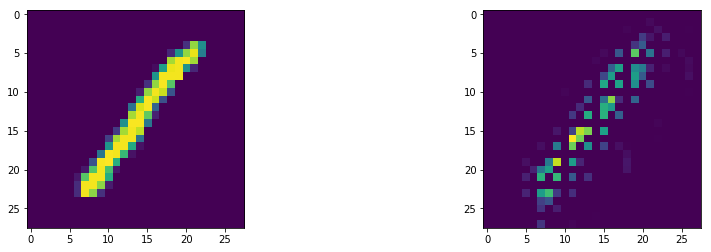

Train Epoch: 15 [57600/60000 (96%)]	Loss: 0.753946

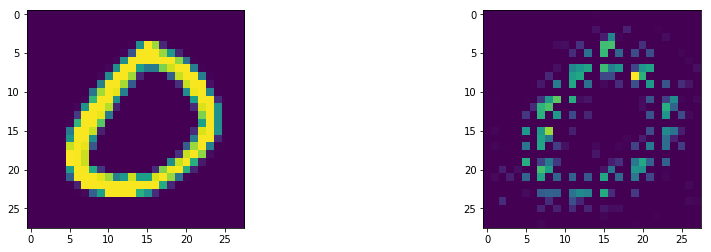

Train Epoch: 16 [57600/60000 (96%)]	Loss: 0.743292

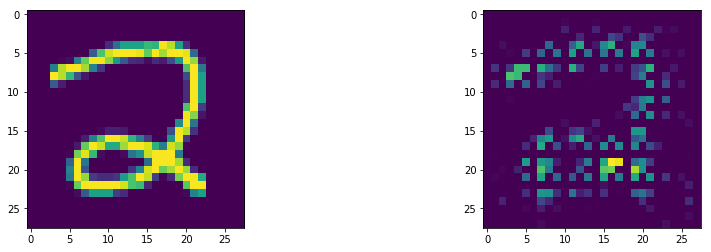

Train Epoch: 17 [57600/60000 (96%)]	Loss: 0.647887

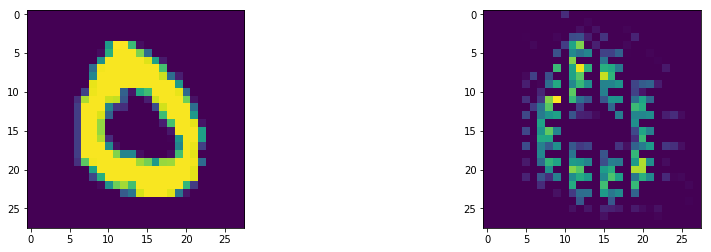

Train Epoch: 18 [57600/60000 (96%)]	Loss: 0.656629

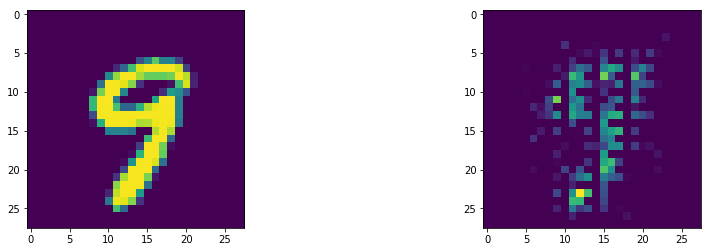

Train Epoch: 19 [57600/60000 (96%)]	Loss: 0.613278

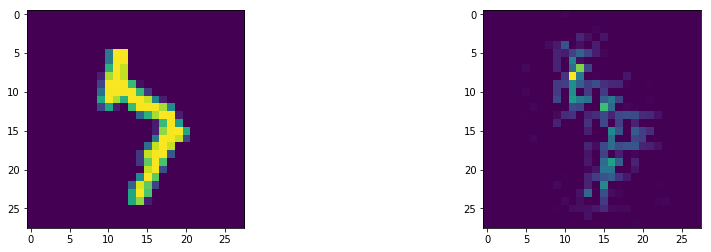

Train Epoch: 20 [57600/60000 (96%)]	Loss: 0.569766

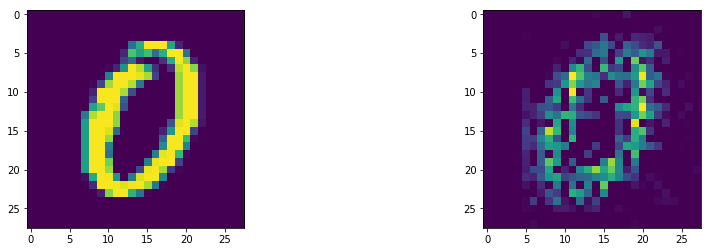

In [3]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = d(model(data))
        loss = F.mse_loss(output, data)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            log.update('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = d(model(data))
            test_loss += F.mse_loss(output, data).item() # sum up batch loss
            
        
        fig=plt.figure(figsize=(15,4))
        
        ax=fig.add_subplot(1,2,1)        
        ax.imshow(data[0].squeeze().numpy())
        
        ax=fig.add_subplot(1,2,2)        
        ax.imshow(output[0].squeeze().numpy())
        plt.show()

def main():
    use_cuda = False
    BATCH_SIZE = 32
    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=BATCH_SIZE, shuffle=True, **kwargs)


    model = embedding.CNN().to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

    for epoch in range(1, 20 + 1):
        train(model, device, train_loader, optimizer, epoch)
        #log.new_line()
        test(model, device, test_loader)


main()